In [25]:
!nvidia-smi

Sun Feb  9 09:03:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             44W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [26]:
import os
HOME = os.getcwd()
print(HOME)

/content/datasets


In [27]:
!pip list | grep torch

torch                              2.5.1+cu124
torchaudio                         2.5.1+cu124
torchsummary                       1.5.1
torchvision                        0.20.1+cu124


In [28]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 33.4/235.7 GB disk)


In [29]:
!pip install roboflow

!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="Y2j4XkVcIPbMjKGQF225")
project = rf.workspace("mdp-keqxr").project("mdp_image_recognition")
version = project.version(2)
dataset = version.download("yolov11")

/content/datasets/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to mdp_image_recognition-2 in yolov11:: 100%|██████████| 8956/8956 [00:00<00:00, 9259.14it/s] 


In [30]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 batch=128 imgsz=640 plots=True

100% 6.25M/6.25M [00:00<00:00, 277MB/s]
New https://pypi.org/project/ultralytics/8.3.73 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/datasets/mdp_image_recognition-2/data.yaml, epochs=50, time=None, patience=100, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, ag

In [12]:
#!ls {HOME}/runs/detect/train/

ls: cannot access '/content/runs/detect/train/': No such file or directory


In [31]:
!ls -l runs/detect/train/


total 5076
-rw-r--r-- 1 root root   1578 Feb  9 09:04 args.yaml
-rw-r--r-- 1 root root 146548 Feb  9 09:15 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 142301 Feb  9 09:15 confusion_matrix.png
-rw-r--r-- 1 root root 218968 Feb  9 09:16 events.out.tfevents.1739091869.c79f3fbae580.9812.0
-rw-r--r-- 1 root root 340430 Feb  9 09:15 F1_curve.png
-rw-r--r-- 1 root root 220690 Feb  9 09:04 labels_correlogram.jpg
-rw-r--r-- 1 root root 147369 Feb  9 09:04 labels.jpg
-rw-r--r-- 1 root root 272999 Feb  9 09:15 P_curve.png
-rw-r--r-- 1 root root  98203 Feb  9 09:15 PR_curve.png
-rw-r--r-- 1 root root 279033 Feb  9 09:15 R_curve.png
-rw-r--r-- 1 root root   6434 Feb  9 09:15 results.csv
-rw-r--r-- 1 root root 251867 Feb  9 09:15 results.png
-rw-r--r-- 1 root root 312416 Feb  9 09:04 train_batch0.jpg
-rw-r--r-- 1 root root 304709 Feb  9 09:13 train_batch1240.jpg
-rw-r--r-- 1 root root 286522 Feb  9 09:13 train_batch1241.jpg
-rw-r--r-- 1 root root 285327 Feb  9 09:13 train_batch1242.jpg
-r

In [32]:
ls -l runs/detect/train/weights/


total 12232
-rw-r--r-- 1 root root 6260195 Feb  9 09:15 best.pt
-rw-r--r-- 1 root root 6260195 Feb  9 09:15 last.pt


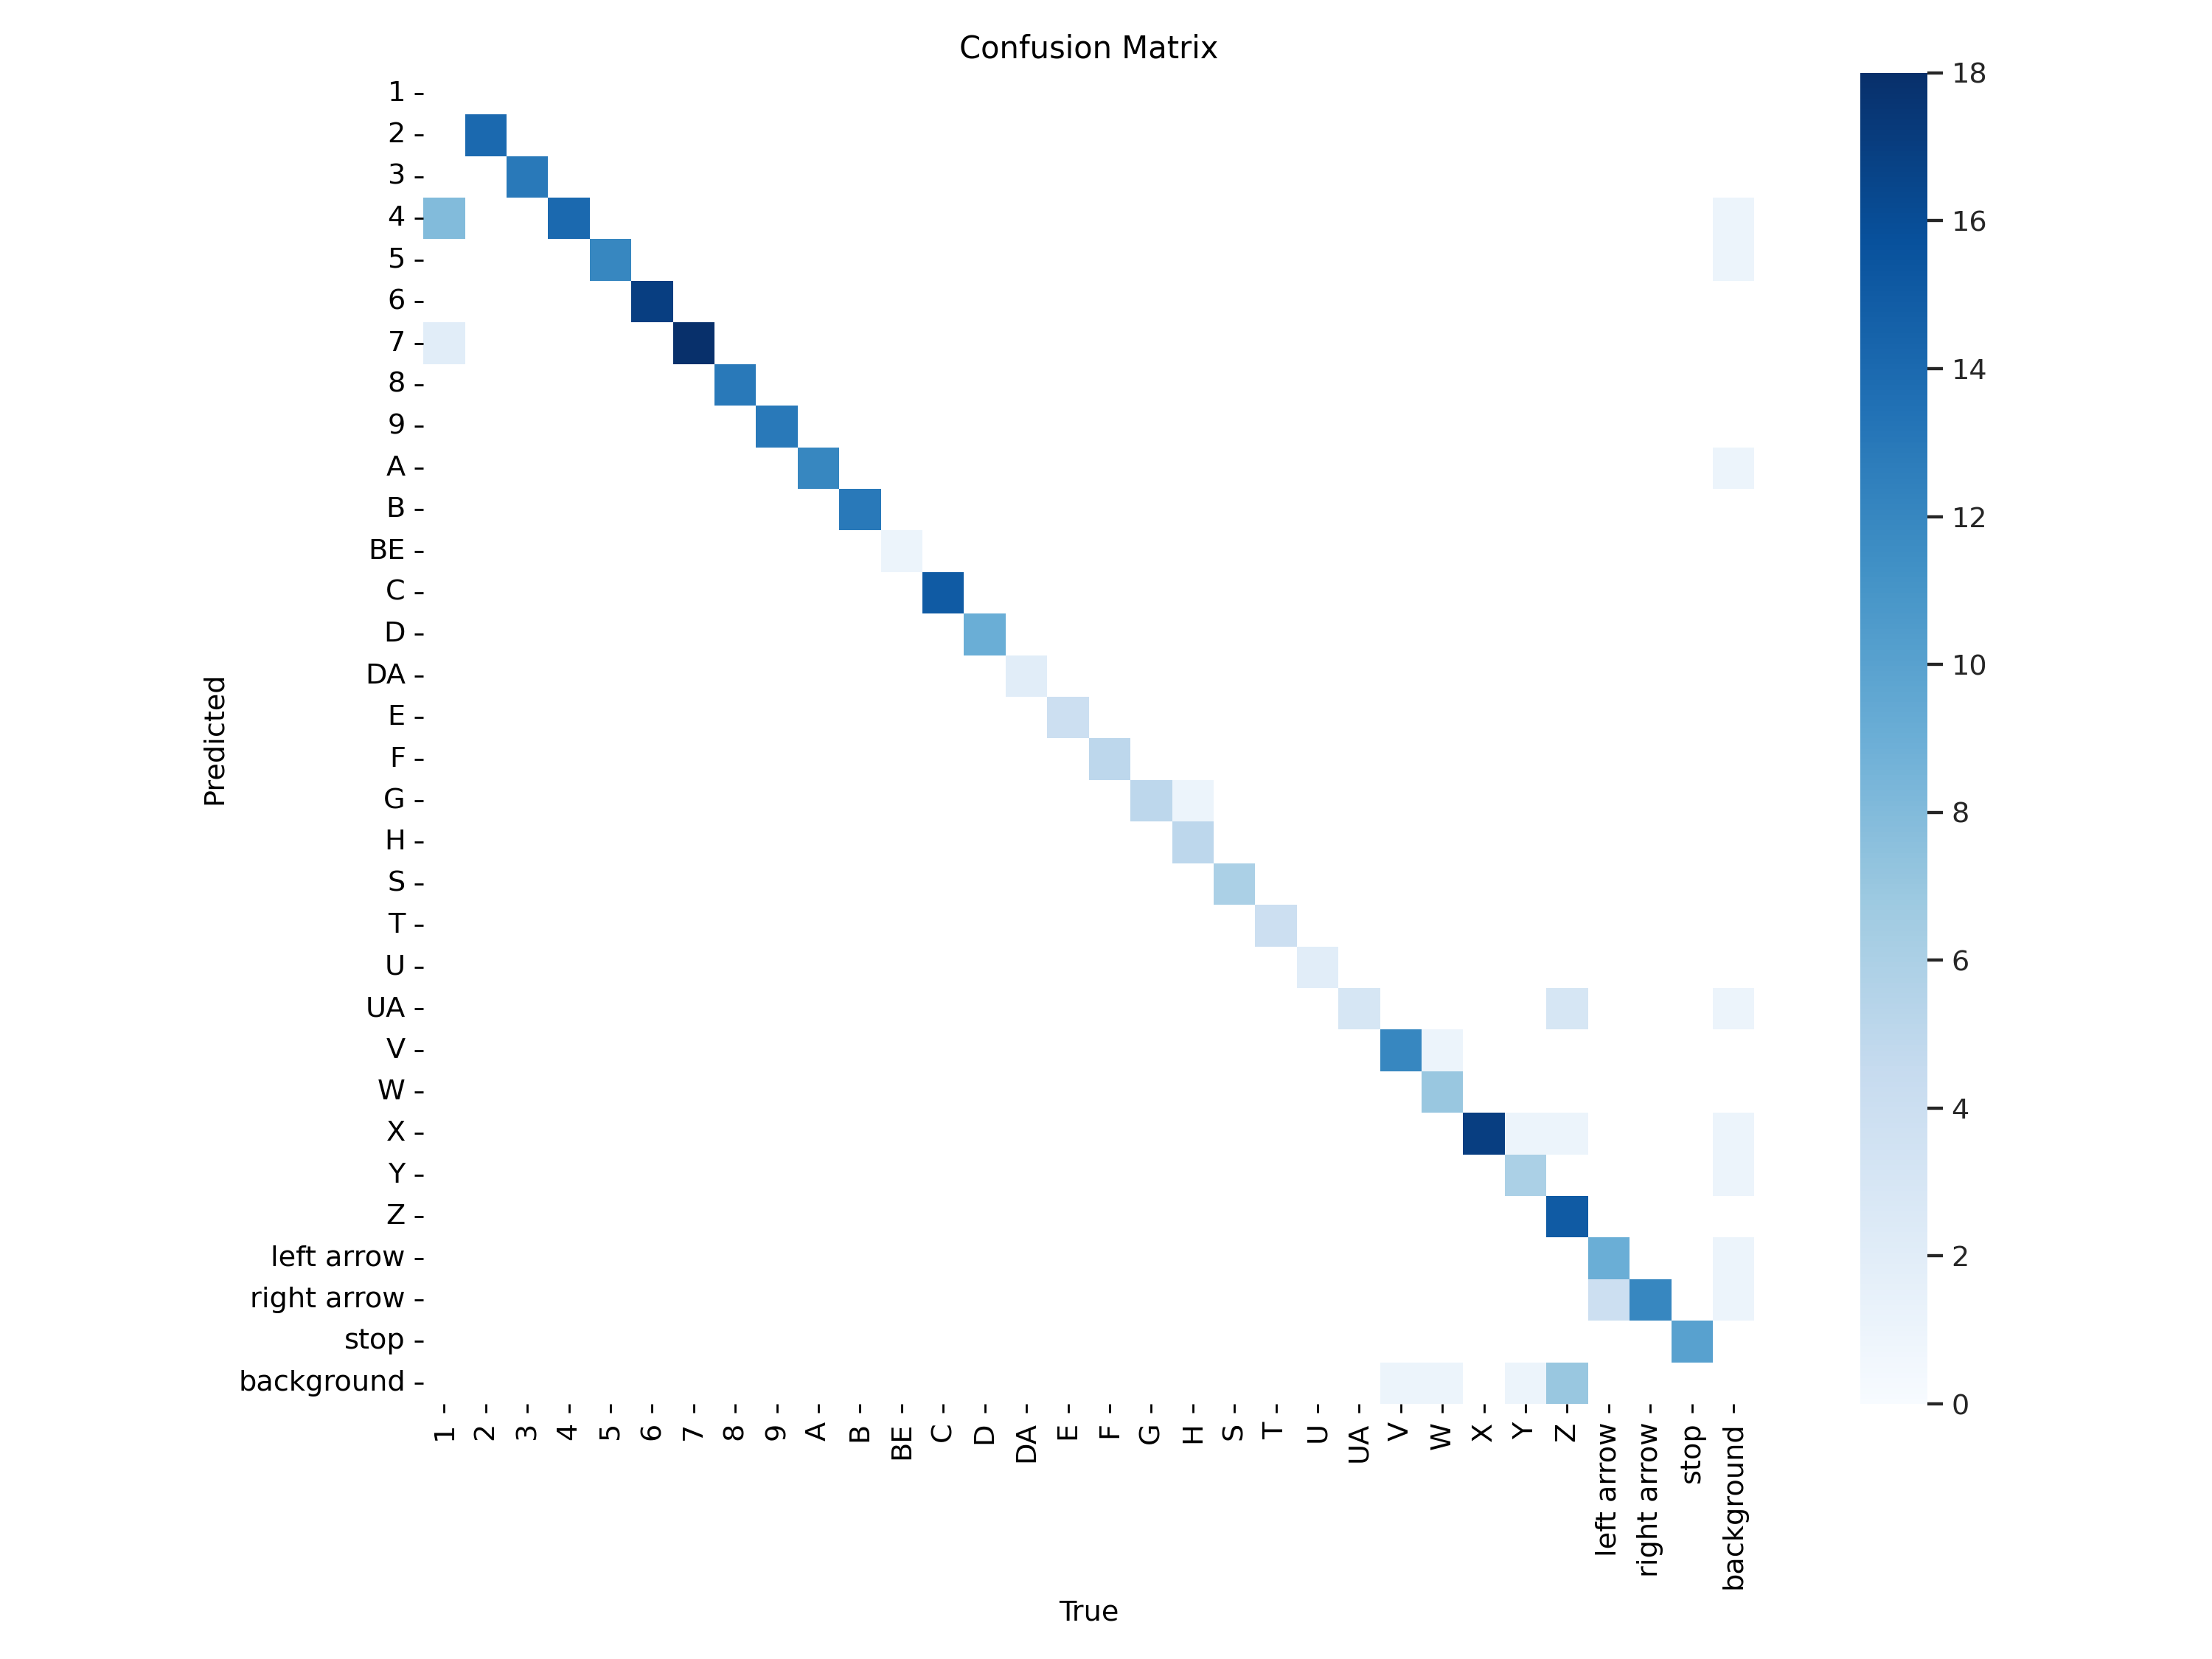

In [33]:
from IPython.display import Image as IPyImage
IPyImage(filename='runs/detect/train/confusion_matrix.png', width=600)

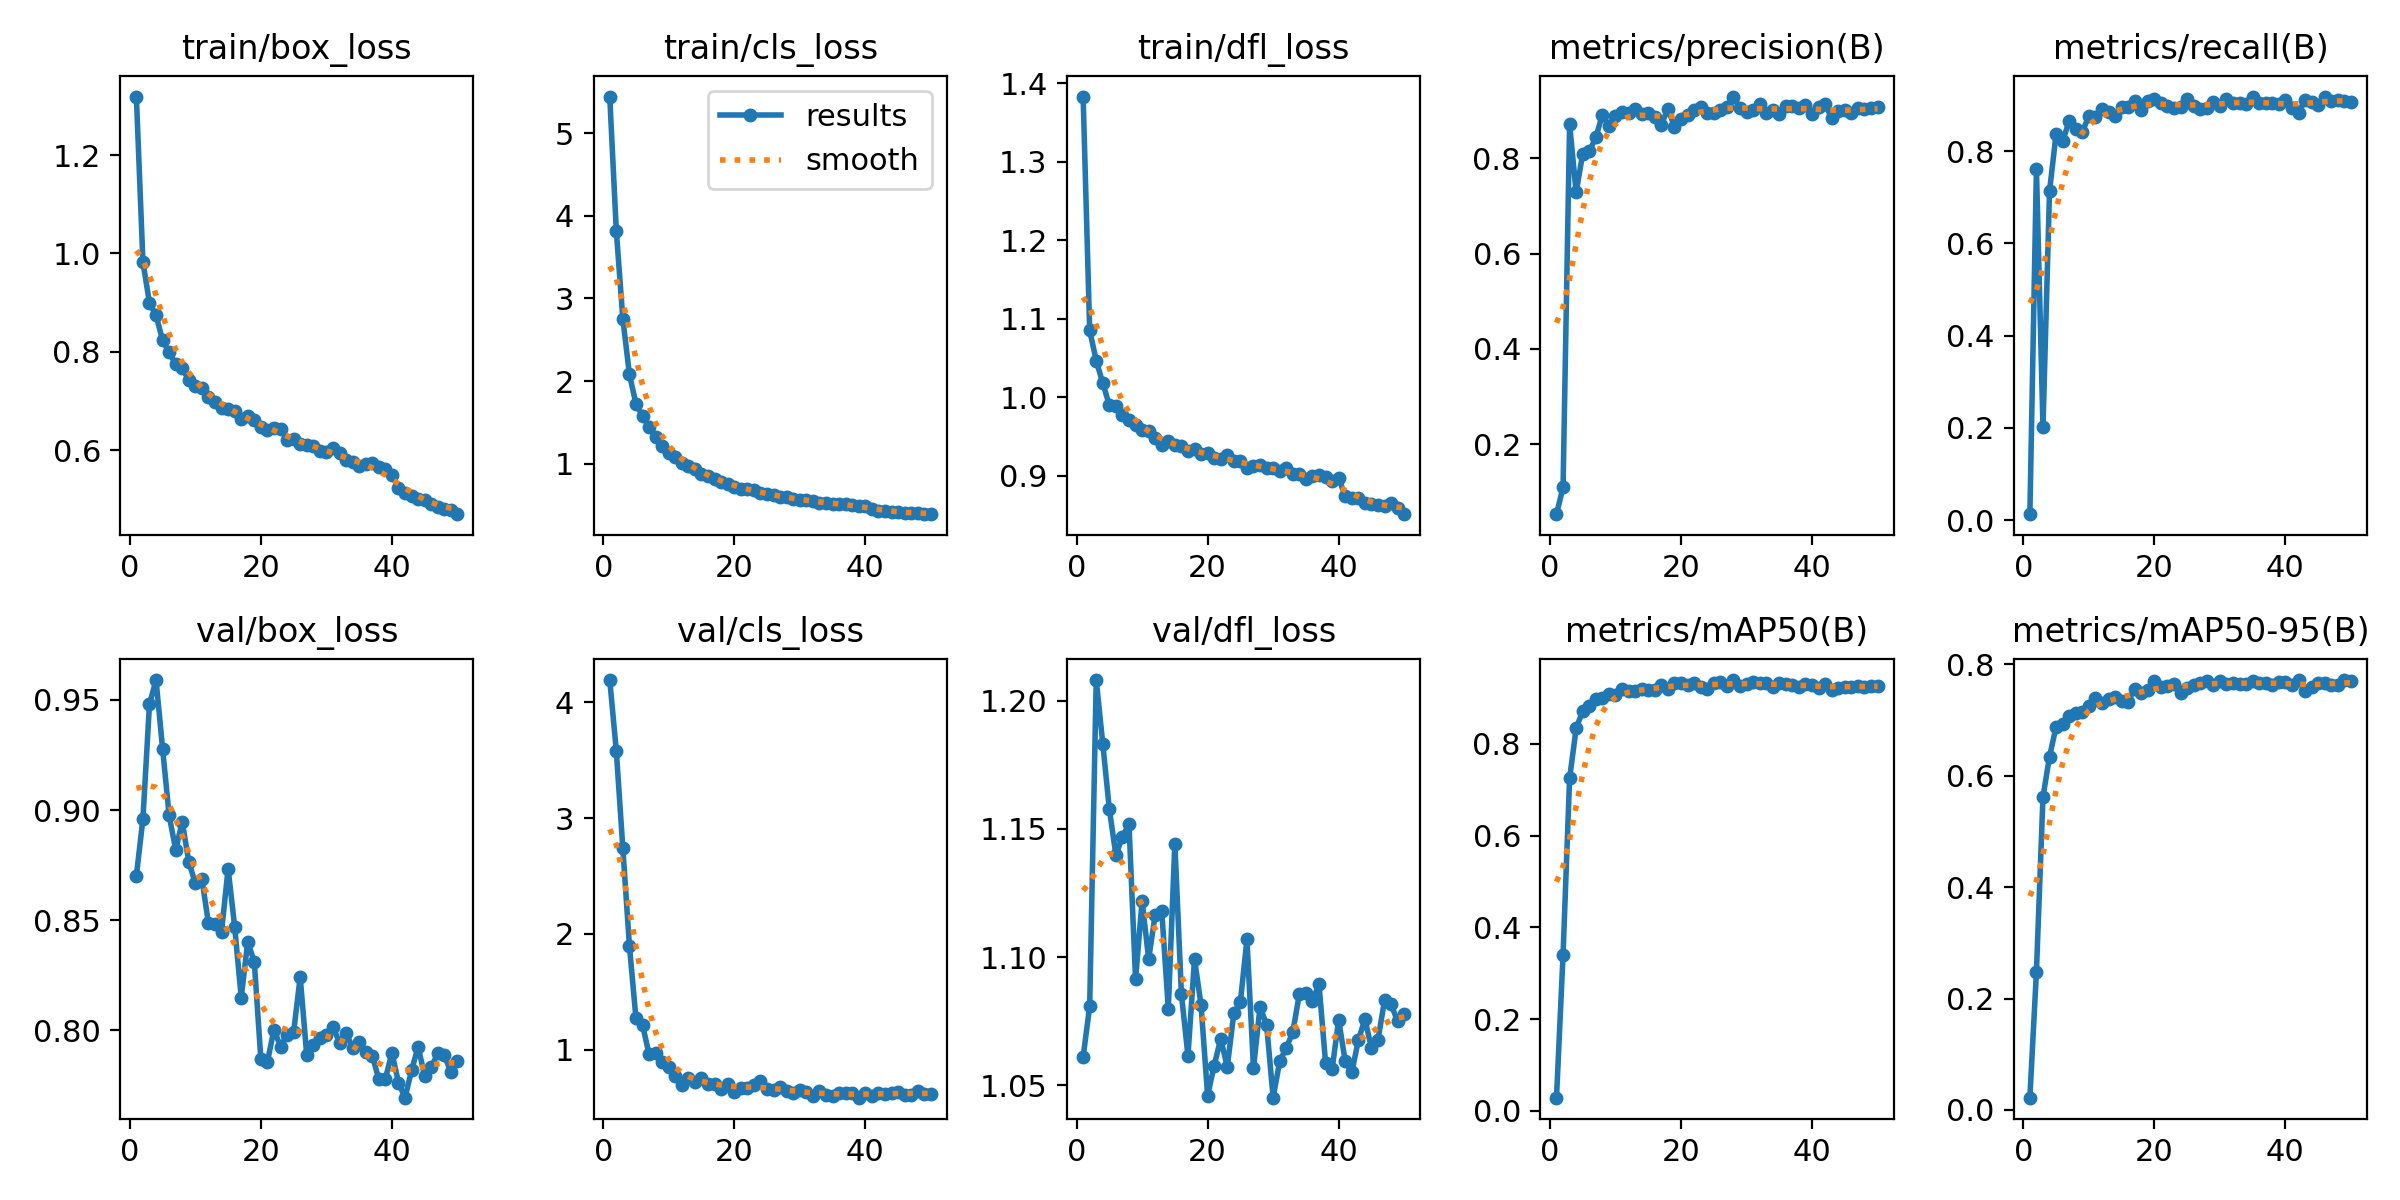

In [34]:

IPyImage(filename='runs/detect/train/results.png', width=600)


In [35]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=mdp_image_recognition-2/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 168 layers, 3,011,693 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/mdp_image_recognition-2/valid/labels.cache... 322 images, 3 backgrounds, 0 corrupt: 100% 322/322 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:02<00:00,  9.57it/s]
                   all        322        319       0.93      0.892      0.937      0.775
                     1         10         10          0          0          0          0
                     2         14         14      0.994          1      0.995      0.851
                     3         13         13      0.996          1      0.995      0.837
                     4         14         14       0.77      0.929      0.945      0.838
                     5         12         12      0.921          1      0.963       0.86
                  

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/best.pt
